# **Coursera Capstone Project**
# Accident Severity of Seattle City
## 1.Introduction

From the vast amount of data available about these incidents, this project tries to predict the severity of an accident by taking into account various dimensions like weather condition, time of the week. It can help a motorist plan his journey for a safer commute.


## 2. Data

The Data used in this project is SDOT Traffic Management Division, Traffic Records Group. It has the information on all types of collisions provided by SPD and recorded by Traffic Records from 2004-2020, updated weekly.
It contains a total of 37 attributes which will help in training the model and give a better prediction. Some of the entries in the data will be omitted to fine tune the model and get a better result.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
pd.set_option('display.max_columns',None)

In [39]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [40]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [41]:
df.shape

(194673, 38)

In [42]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [43]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

The Data contains lots of columns which will not be used in this project as it creates a bias and reduces the accuracy


In [44]:
df.drop(['INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','PEDROWNOTGRNT','SPEEDING','INATTENTIONIND',],axis=1,inplace=True)

In [45]:
df.shape

(194673, 32)

In [46]:
df.drop(['INCKEY','COLDETKEY','REPORTNO','INCDTTM','SEGLANEKEY','CROSSWALKKEY','STATUS','SEVERITYCODE.1','SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC'],axis=1,inplace=True)

In [47]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,1,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,2,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,3,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,4,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,5,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,N


In [48]:
df.isna().sum()

SEVERITYCODE        0
X                5334
Y                5334
OBJECTID            0
ADDRTYPE         1926
LOCATION         2677
SEVERITYDESC        0
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDATE             0
JUNCTIONTYPE     6329
SDOT_COLCODE        0
SDOT_COLDESC        0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

# **Data Analysis**

In [49]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

The main objective of this project is to predict the severity code of the incident given some conditions. The Severity code 1 indicates property damage and 2 indicates injury.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


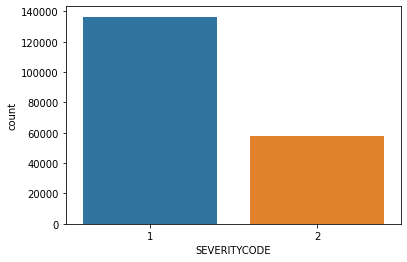

In [50]:
sns.countplot('SEVERITYCODE',data=df)

In [51]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts()

ADDRTYPE      SEVERITYCODE
Alley         1                 669
              2                  82
Block         1               96830
              2               30096
Intersection  1               37251
              2               27819
Name: SEVERITYCODE, dtype: int64

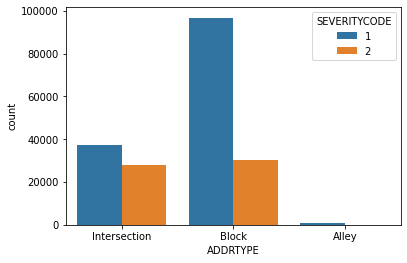

In [52]:
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df,)

In [53]:
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
CHERRY ST ON RP BETWEEN CHERRY ST AND I5 NB                         1
RAVENNA AVE NE AND NE 70TH ST                                       1
E WARD ST BETWEEN 31ST E AVE E AND 32ND AVE E                       1
CORLISS AVE N AND N 135TH ST                                        1
ASHWORTH AVE N BETWEEN N 41ST ST AND N 42ND ST                      1
Name: LOCATION, Length: 24102, dtype: int64

In [54]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Name: SEVERITYCODE, dtype: int64

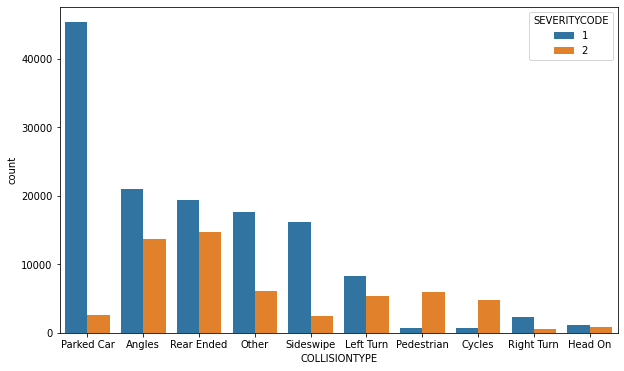

In [55]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE',data=df,order=df['COLLISIONTYPE'].value_counts().index)

In [56]:
df.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts()

PERSONCOUNT  SEVERITYCODE
0            1                3782
             2                1762
1            1                9858
             2                3296
2            1               86420
                             ...  
48           2                   1
53           1                   1
54           2                   1
57           1                   1
81           2                   1
Name: SEVERITYCODE, Length: 79, dtype: int64

In [57]:
df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts()

PEDCOUNT  SEVERITYCODE
0         1               135787
          2                51947
1         2                 6007
          1                  678
2         2                  207
          1                   19
3         2                   21
          1                    1
4         2                    4
5         2                    1
6         2                    1
Name: SEVERITYCODE, dtype: int64

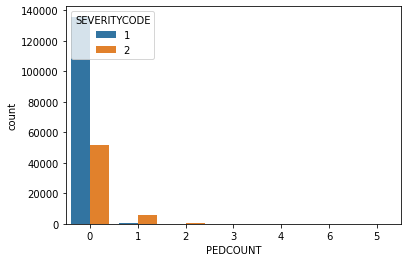

In [58]:
sns.countplot(x='PEDCOUNT', hue='SEVERITYCODE',data=df,order=df['PEDCOUNT'].value_counts().index)

In [59]:
df.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts()

PEDCYLCOUNT  SEVERITYCODE
0            1               135806
             2                53383
1            2                 4762
             1                  679
2            2                   43
Name: SEVERITYCODE, dtype: int64

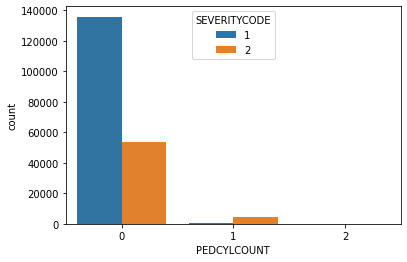

In [60]:
sns.countplot(x='PEDCYLCOUNT', hue='SEVERITYCODE',data=df,order=df['PEDCYLCOUNT'].value_counts().index)

In [61]:
df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts()

VEHCOUNT  SEVERITYCODE
0         1                 3858
          2                 1227
1         2                14105
          1                11643
2         1               111701
          2                35949
3         1                 7540
          2                 5470
4         1                 1348
          2                 1078
5         1                  268
          2                  261
6         1                   86
          2                   60
7         1                   24
          2                   22
8         1                   10
          2                    5
9         2                    6
          1                    3
10        2                    2
11        1                    3
          2                    3
12        1                    1
Name: SEVERITYCODE, dtype: int64

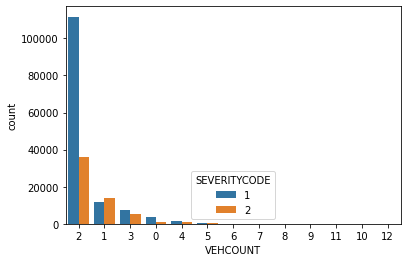

In [62]:
sns.countplot(x='VEHCOUNT', hue='SEVERITYCODE',data=df,order=df['VEHCOUNT'].value_counts().index)

In [63]:
df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()

UNDERINFL  SEVERITYCODE
0          1               57693
           2               22701
1          1                2372
           2                1623
N          1               69378
           2               30896
Y          1                3187
           2                1939
Name: SEVERITYCODE, dtype: int64

In [64]:
df['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)

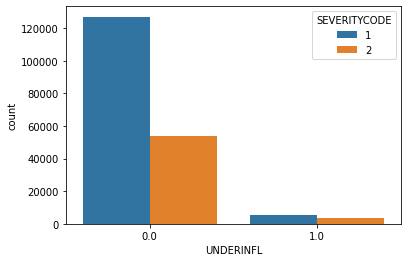

In [71]:
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE',data=df,order=df['UNDERINFL'].value_counts().index)

In [65]:
df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts()

UNDERINFL  SEVERITYCODE
0.0        1               127071
           2                53597
1.0        1                 5559
           2                 3562
Name: SEVERITYCODE, dtype: int64

In [66]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  41
                          2                  15
Clear                     1               75295
                          2               35840
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                 716
                          2                 116
Overcast                  1               18969
                          2                8745
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21969
                          2               11176
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 736
                          2                 171
U

In [67]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()

ROADCOND        SEVERITYCODE
Dry             1               84446
                2               40064
Ice             1                 936
                2                 273
Oil             1                  40
                2                  24
Other           1                  89
                2                  43
Sand/Mud/Dirt   1                  52
                2                  23
Snow/Slush      1                 837
                2                 167
Standing Water  1                  85
                2                  30
Unknown         1               14329
                2                 749
Wet             1               31719
                2               15755
Name: SEVERITYCODE, dtype: int64

In [68]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1203
                          2                 334
Dark - Street Lights Off  1                 883
                          2                 316
Dark - Street Lights On   1               34032
                          2               14475
Dark - Unknown Lighting   1                   7
                          2                   4
Dawn                      1                1678
                          2                 824
Daylight                  1               77593
                          2               38544
Dusk                      1                3958
                          2                1944
Other                     1                 183
                          2                  52
Unknown                   1               12868
                          2                 605
Name: SEVERITYCODE, dtype: int64

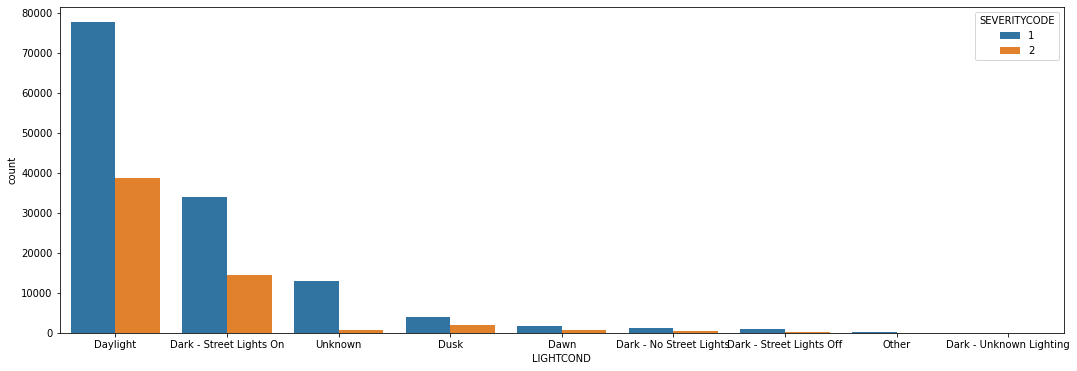

In [69]:
f, ax=plt.subplots(figsize=(18,6))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE',data=df,order=df['LIGHTCOND'].value_counts().index)

In [70]:
df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts()

HITPARKEDCAR  SEVERITYCODE
N             1               129717
              2                57740
Y             1                 6768
              2                  448
Name: SEVERITYCODE, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


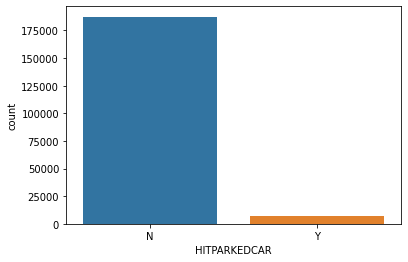

In [72]:
sns.countplot('HITPARKEDCAR',data=df)

In [73]:
df['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)
df['COLLISIONTYPE'].replace(to_replace=['Rear Ended', 'Angles', 'Parked Car', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
df['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)', 'Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'], value=[0,1,2,3,4,5,6],inplace=True)
df['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df['ROADCOND'].replace(to_replace=['Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other', 'Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)

In [75]:
features = df[['SEVERITYCODE','ADDRTYPE','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','PEDCYLCOUNT','PERSONCOUNT','PEDCOUNT','ROADCOND','LIGHTCOND','WEATHER','HITPARKEDCAR']]
features.head()


,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,PEDCYLCOUNT,PERSONCOUNT,PEDCOUNT,ROADCOND,LIGHTCOND,WEATHER,HITPARKEDCAR
0,2,2.0,1.0,1.0,2,0,2,0,8.0,0.0,2.0,0
1,1,1.0,0.0,4.0,2,0,2,0,8.0,1.0,1.0,0
2,1,1.0,0.0,2.0,3,0,4,0,0.0,0.0,2.0,0
3,1,1.0,0.0,3.0,3,0,3,0,0.0,0.0,0.0,0
4,2,2.0,1.0,1.0,2,0,2,0,8.0,0.0,1.0,0


In [77]:
features.isna().sum()

SEVERITYCODE        0
ADDRTYPE         1926
JUNCTIONTYPE     6329
COLLISIONTYPE    4904
VEHCOUNT            0
PEDCYLCOUNT         0
PERSONCOUNT         0
PEDCOUNT            0
ROADCOND         5012
LIGHTCOND        5170
WEATHER          5081
HITPARKEDCAR        0
dtype: int64

In [78]:
features.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
features.isna().sum()

SEVERITYCODE     0
ADDRTYPE         0
JUNCTIONTYPE     0
COLLISIONTYPE    0
VEHCOUNT         0
PEDCYLCOUNT      0
PERSONCOUNT      0
PEDCOUNT         0
ROADCOND         0
LIGHTCOND        0
WEATHER          0
HITPARKEDCAR     0
dtype: int64

In [80]:
print("Rows:", features.shape[0])
print("Columns:", features.shape[1])

Rows: 182895
Columns: 12


In [81]:
features.dtypes

SEVERITYCODE       int64
ADDRTYPE         float64
JUNCTIONTYPE     float64
COLLISIONTYPE    float64
VEHCOUNT           int64
PEDCYLCOUNT        int64
PERSONCOUNT        int64
PEDCOUNT           int64
ROADCOND         float64
LIGHTCOND        float64
WEATHER          float64
HITPARKEDCAR       int64
dtype: object

In [82]:
features.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'JUNCTIONTYPE', 'COLLISIONTYPE', 'VEHCOUNT',
       'PEDCYLCOUNT', 'PERSONCOUNT', 'PEDCOUNT', 'ROADCOND', 'LIGHTCOND',
       'WEATHER', 'HITPARKEDCAR'],
      dtype='object')

In [84]:
X=features[['ADDRTYPE', 'JUNCTIONTYPE', 'COLLISIONTYPE', 'VEHCOUNT',
       'PEDCYLCOUNT', 'PERSONCOUNT', 'PEDCOUNT', 'ROADCOND', 'LIGHTCOND',
       'WEATHER', 'HITPARKEDCAR']]
y=features['SEVERITYCODE']       

In [85]:
X.shape

(182895, 11)

In [86]:
y.shape

(182895,)

In [87]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

Normalizing the Data set

In [92]:
X=preprocessing.StandardScaler().fit(X).transform(X)

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [95]:
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (146316, 11) (146316,)
Test set: (36579, 11) (36579,)


# **Modeling**

## K Nearest Neighbor

In [96]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68924793, 0.71084502, 0.70403784, 0.72615435, 0.72301047,
       0.72842341, 0.71595724, 0.7256896 , 0.71841767, 0.73438312,
       0.72287378, 0.72973564, 0.72525219, 0.73184067, 0.72612701,
       0.73189535, 0.73123924, 0.73812843, 0.73525793, 0.73687088,
       0.73678887, 0.73955002, 0.7377457 , 0.73952268, 0.73837448,
       0.73796441, 0.73599606, 0.73766369, 0.73648815])

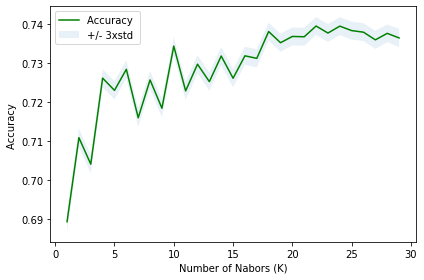

In [97]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [98]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7395500150359496 with k= 22


In [99]:
k = 24
#Train Model and Predict  
neigh_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_neigh = neigh_knn.predict(X_test)
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
print("Avg F1-score: %.2f" % f1_score(y_test, yhat_neigh, average='weighted'))
print("Jaccard score: %.2f" % jaccard_similarity_score(y_test, yhat_neigh))

Avg F1-score: 0.71
Jaccard score: 0.74


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


## Decision Tree

In [100]:
depths = 20
avg_f1_tree = np.zeros((depths-1))
jaccard_index_tree = np.zeros((depths-1))
for n in range(1,depths):
    #Train Model and Predict  
    carTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    carTree.fit(X_train, y_train)
    yhat_tree = carTree.predict(X_test)
    avg_f1_tree[n-1] = f1_score(y_test, yhat_tree, average='weighted')
    jaccard_index_tree[n-1]=jaccard_similarity_score(y_test, yhat_tree)
    
    
#carTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#carTree
avg_f1_tree

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

array([0.66910604, 0.66933358, 0.66933358, 0.70171044, 0.69438879,
       0.70312548, 0.70541613, 0.70477081, 0.71293068, 0.71201796,
       0.71151916, 0.71313149, 0.71236905, 0.71166807, 0.71046709,
       0.71071629, 0.71029592, 0.71057393, 0.70897701])

In [101]:
jaccard_index_tree

array([0.7251155 , 0.73610542, 0.73610542, 0.74433418, 0.74389677,
       0.74594713, 0.74613849, 0.74671259, 0.74567375, 0.74567375,
       0.74504497, 0.74389677, 0.74340469, 0.74436152, 0.74359605,
       0.7426939 , 0.74181908, 0.74116296, 0.74045217])

In [102]:
print( "The best accuracy was with", avg_f1_tree.max(), "with depth=", avg_f1_tree.argmax()+1)

The best accuracy was with 0.7131314928483622 with depth= 12


In [103]:
print("Avg F1-score: %.4f" % avg_f1_tree[11])
print("Jaccard index: %.4f" % jaccard_index_tree[11])

Avg F1-score: 0.7131
Jaccard index: 0.7439
